In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [47]:
df = pd.read_csv("bank-full.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [48]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [49]:
object_attrib = df.select_dtypes(include = ['object'])
object_attrib.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [50]:
#Label encoder
from sklearn.preprocessing import LabelEncoder

In [51]:
lbe = LabelEncoder()

In [52]:
df["job"] = lbe.fit_transform(df["job"])
df["marital"] = lbe.fit_transform(df["marital"])
df["education"] = lbe.fit_transform(df["education"])
df["default"] = lbe.fit_transform(df["default"])
df["housing"] = lbe.fit_transform(df["housing"])
df["loan"] = lbe.fit_transform(df["loan"])
df["contact"] = lbe.fit_transform(df["contact"])
df["month"] = lbe.fit_transform(df["month"])
df["poutcome"] = lbe.fit_transform(df["poutcome"])
df["y"] = lbe.fit_transform(df["y"])


In [53]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [54]:
len(df.columns)

17

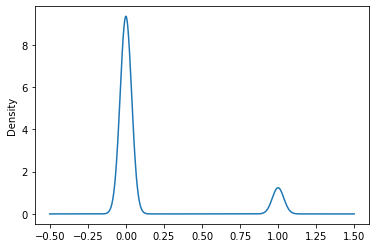

In [12]:
df['New_y'].plot.density()

In [55]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


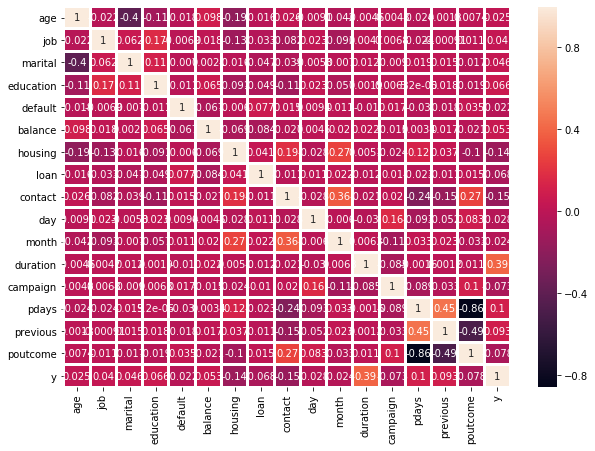

In [57]:
plt.figure(figsize =(10,7))
sns.heatmap(df.corr(),annot=True,linewidth=2)

In [58]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.339762,1.167725,1.224813,0.018027,1362.272058,0.555838,0.160226,0.640242,15.806419,5.523014,258.163080,2.763841,40.197828,0.580323,2.559974,0.116985
std,10.618762,3.272657,0.608230,0.747997,0.133049,3044.765829,0.496878,0.366820,0.897951,8.322476,3.006911,257.527812,3.098021,100.128746,2.303441,0.989059,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,3.000000,103.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,2.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null int32
marital      45211 non-null int32
education    45211 non-null int32
default      45211 non-null int32
balance      45211 non-null int64
housing      45211 non-null int32
loan         45211 non-null int32
contact      45211 non-null int32
day          45211 non-null int64
month        45211 non-null int32
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null int32
y            45211 non-null int32
dtypes: int32(10), int64(7)
memory usage: 4.1 MB


In [59]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0


In [63]:
X = df.iloc[:,0:16]
X.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3


In [64]:
Y = df.iloc[:,-1]
Y.head(2)

0    0
1    0
Name: y, dtype: int32

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=123)

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
logmodel = LogisticRegression()

In [69]:
logmodel.fit(X_train,Y_train)

C:\Users\karale_M\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
Y_predictions = logmodel.predict(X_test)
Y_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [71]:
from sklearn.metrics import classification_report

In [72]:
classification_report(Y_test,Y_predictions)

'              precision    recall  f1-score   support\n\n           0       0.90      0.98      0.94      7986\n           1       0.58      0.20      0.30      1057\n\n    accuracy                           0.89      9043\n   macro avg       0.74      0.59      0.62      9043\nweighted avg       0.87      0.89      0.87      9043\n'

In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
confusion_matrix(Y_test,Y_predictions)

array([[7833,  153],
       [ 845,  212]], dtype=int64)

In [77]:
acc=(7833+212)/(7833+153+845+212)*100
acc

88.96383943381622

In [75]:
from sklearn.metrics import accuracy_score

In [79]:
accuracy_score(Y_test,Y_predictions)*100

88.96383943381622

In [80]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = sm.OLS(Y,X,data = df).fit()
model.params

age         -0.000063
job          0.000443
marital      0.009227
education    0.012765
default     -0.023129
balance      0.000002
housing     -0.091090
loan        -0.047164
contact     -0.037610
day         -0.000697
month        0.004049
duration     0.000479
campaign    -0.003251
pdays        0.000302
previous     0.007178
poutcome     0.011686
dtype: float64

In [81]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.302
Model:                            OLS   Adj. R-squared (uncentered):              0.302
Method:                 Least Squares   F-statistic:                              1223.
Date:                Sun, 12 Apr 2020   Prob (F-statistic):                        0.00
Time:                        16:27:04   Log-Likelihood:                         -7517.3
No. Observations:               45211   AIC:                                  1.507e+04
Df Residuals:                   45195   BIC:                                  1.521e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age        -6.288e-05      0.000     -0.560      0.575      -0.000       0.000
job            0.0004      0.000      1.063      0.288      -0.000       0.001
marital        0.0092      0.002      4.164      0.000       0.005       0.014
education      0.0128      0.002      7.046      0.000       0.009       0.016
default       -0.0231      0.010     -2.276      0.023      -0.043      -0.003
balance     2.276e-06   4.49e-07      5.074      0.000     1.4e-06    3.16e-06
housing       -0.0911      0.003    -31.665      0.000      -0.097      -0.085
loan          -0.0472      0.004    -12.781      0.000      -0.054      -0.040
contact       -0.0376      0.002    -21.924      0.000      -0.041      -0.034
day           -0.0007      0.000     -4.314      0.000      -0.001      -0.000
month          0.0040      0.000      8.275      0.000       0.003       0.005
duration       0.0005   5.22e-06     91.722      0.000       0.000       0.000
campaign      -0.0033      0.000     -7.300      0.000      -0.004      -0.002
pdays          0.0003   2.21e-05     13.706      0.000       0.000       0.000
previous       0.0072      0.001     10.781      0.000       0.006       0.008
poutcome       0.0117      0.002      5.599      0.000       0.008       0.016
==============================================================================
Omnibus:                    14204.813   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41448.699
Skew:                           1.663   Prob(JB):                         0.00
Kurtosis:                       6.308   Cond. No.                     2.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""